In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pywaffle import Waffle

In [2]:
df = pd.read_csv("dataset.csv")

df.columns = df.columns.str.lower()
df = df.drop(["_id"], axis=1)

df["month"] = pd.to_datetime(df["month"], format = "%b-%y")
df = df.rename(columns = {"month":"date"})

df.sample(10)

,date,in_out,australian_city,international_city,airline,route,port_country,port_region,service_country,service_region,stops,all_flights,max_seats,year,month_num
51311,2012-08-01,O,Melbourne,Ho Chi Minh City,Vietnam Airlines,MEL-SGN-HAN,Vietnam,SE Asia,Vietnam,SE Asia,0,27,7560,2012,8
2954,2004-12-01,I,Brisbane,Nadi,Fiji Airways,NAN-BNE,Fiji,Islands,Fiji,Islands,0,31,5056,2004,12
81216,2017-02-01,O,Brisbane,Dubai,Emirates,AKL-BNE-DXB,United Arab Emirates,Middle East,United Arab Emirates,Middle East,0,28,13664,2017,2
21530,2008-05-01,I,Brisbane,Hong Kong,Cathay Pacific Airways,HKG-BNE,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,4,1244,2008,5
94107,2018-11-01,O,Melbourne,Hong Kong,Virgin Australia,MEL-HKG,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,28,7700,2018,11
64738,2014-08-01,O,Melbourne,Ho Chi Minh City,Vietnam Airlines,MEL-SGN,Vietnam,SE Asia,Vietnam,SE Asia,0,27,7546,2014,8
13171,2007-01-01,O,Melbourne,Vancouver,Qantas Airways,MEL-SYD-SFO-YVR,Canada,N America,Canada,N America,2,13,4332,2007,1
93503,2018-10-01,O,Melbourne,Singapore,Jetstar,MEL-SIN,Singapore,SE Asia,Singapore,SE Asia,0,8,2680,2018,10
97080,2019-04-01,I,Sydney,London,Qantas Airways,LON-SIN-SYD,UK,Europe,UK,Europe,1,30,14519,2019,4
61843,2014-03-01,I,Sydney,Honolulu,Jetstar,HNL-SYD,USA,N America,USA,N America,0,21,6363,2014,3


In [3]:
# as suggested in the data description
df_stops = df.copy()
df = df[df.stops == 0]

1. number of flights over the years
2. number of seat capacity over months/years
3. compare incoming and outgoing flights for different cities
4. number of flight and seat capacity for each airline
5. flights vs. seat capacity for each airline, with bubble size representing the number of flights. Airline (x-axis) vs. Max_Seats (y-axis) with bubble size All_Flights. plotly
6. most frequest traveled routes (network diagram) between AU and international cities

In [4]:
airline_scores = pd.read_csv("airline_scores.csv")
airline_scores

,airline_name,rank,score
0,Singapore Airlines,1,101.0
1,Qatar Airways,2,100.0
2,ANA All Nippon Airways,3,99.0
3,Emirates,4,98.0
4,Japan Airlines,5,97.0
...,...,...,...
95,Air Dolomiti,96,6.0
96,Breeze Airways,97,5.0
97,Norwegian,98,4.0
98,Porter Airlines,99,3.0


In [5]:
airline_names_df = set(df['airline'].tolist())
airline_names_scores = airline_scores['airline_name'].tolist()
missing_airlines = [airline for airline in airline_names_df if airline not in airline_names_scores]

print("missing airline score:", len(missing_airlines))


missing airline score: 57


In [6]:
missing_airlines_mapping = {
    "All Nippon Airways": "ANA All Nippon Airways",
    "Jetstar": "Jetstar Airways",
    "Indonesia AirAsia": "AirAsia",
    "Scoot Tigerair": "Scoot",
    "Thai AirAsia X": "AirAsia",
    "Eva Air": "EVA Air",
    "LATAM Airlines": "LATAM",
    "Virgin Atlantic Airways": "Virgin Atlantic",
    "Citilink Indonesia": "Citilink",
    "Thai Airways International": "Thai Airways",
    "V Australia": "Virgin Australia",
    "Indonesia AirAsia Extra": "AirAsia",
    "AirAsia X": "AirAsia",
}

In [7]:
# feature engingeering add score 
airline_score_mapping = {}
for _, row in airline_scores.iterrows():
    airline_score_mapping[row["airline_name"]] = row["score"]

def get_airline_score(airline):
    if airline in airline_score_mapping:
        return airline_score_mapping[airline]
    elif airline in missing_airlines_mapping:
        return airline_score_mapping[missing_airlines_mapping[airline]]
    else:
        return 1

df["airline_score"] = df["airline"].apply(get_airline_score)

df

,date,in_out,australian_city,international_city,airline,route,port_country,port_region,service_country,service_region,stops,all_flights,max_seats,year,month_num,airline_score
0,2003-09-01,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,9,72.0
1,2003-09-01,I,Adelaide,Hong Kong,Cathay Pacific Airways,HKG-ADL-MEL,Hong Kong (SAR),NE Asia,Hong Kong (SAR),NE Asia,0,8,2008,2003,9,94.0
2,2003-09-01,I,Adelaide,Kuala Lumpur,Malaysia Airlines,KUL-ADL,Malaysia,SE Asia,Malaysia,SE Asia,0,17,4726,2003,9,55.0
5,2003-09-01,I,Adelaide,Singapore,Singapore Airlines,SIN-ADL,Singapore,SE Asia,Singapore,SE Asia,0,12,3876,2003,9,101.0
6,2003-09-01,I,Brisbane,Auckland,Air New Zealand,AKL-BNE,New Zealand,New Zealand,New Zealand,New Zealand,0,36,12624,2003,9,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110050,2022-09-01,O,Sydney,Vancouver,Air Canada,SYD-YVR,Canada,N America,Canada,N America,0,33,10232,2022,9,64.0
110051,2022-09-01,O,Sydney,Vancouver,Qantas Airways,SYD-YVR,Canada,N America,Canada,N America,0,13,3068,2022,9,85.0
110052,2022-09-01,O,Sydney,Wellington,Air New Zealand,SYD-WLG,New Zealand,New Zealand,New Zealand,New Zealand,0,29,4686,2022,9,83.0
110053,2022-09-01,O,Sydney,Wellington,Qantas Airways,SYD-WLG,New Zealand,New Zealand,New Zealand,New Zealand,0,42,7308,2022,9,85.0


In [8]:
df['avg_seat_per_flight'] = df['max_seats'] / df['all_flights']
df['total_seats'] = df['all_flights'] * df['max_seats']
df['international_city'] = df['international_city'].replace('Palmerston', 'Palmerston North')

# Setup

In [9]:
color_palette = ["#0D5474", "#1B9099", "#7FCAA3", "#B8E6A8", "#FBDD9F",
                 "#FCB156", "#EE8F71", "#DE5556", "#DB3D78", "#7A226E"]
sns.set_palette(color_palette)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_palette)

## Time Series Trends of Flights

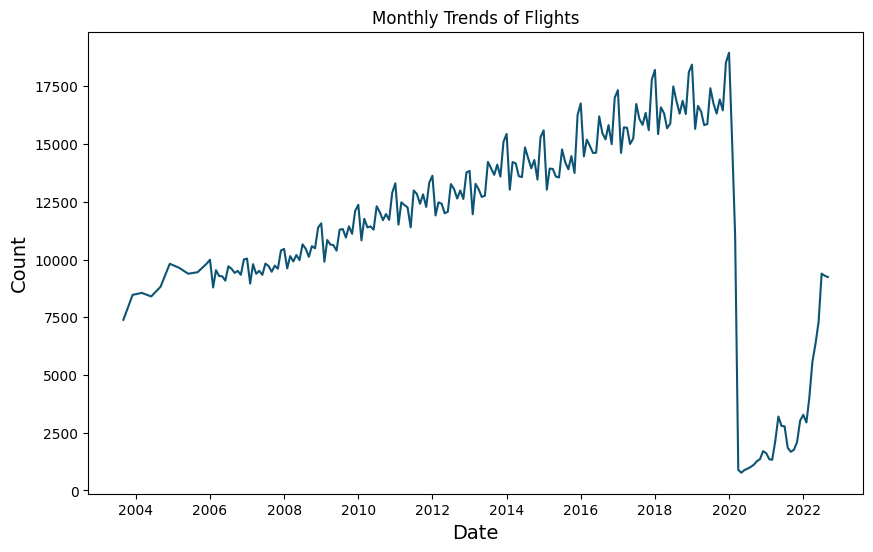

In [10]:
monthly_data = df.groupby(['date']).agg({'all_flights': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data, x='date', y='all_flights')
plt.title('Monthly Trends of Flights')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## I vs O Flights for Australian Cities

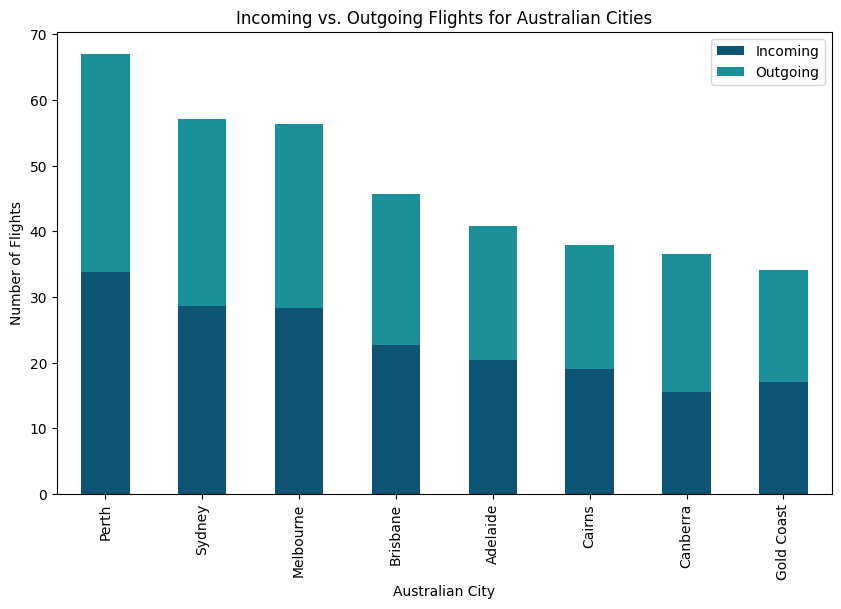

In [11]:
city_flights = df.groupby(['australian_city', 'in_out']).agg({'all_flights': 'mean'}).unstack().fillna(0)
city_flights.columns = city_flights.columns.droplevel()
city_flights['total_flights'] = city_flights.sum(axis=1)
top_8_cities = city_flights.sort_values('total_flights', ascending=False).head(8).drop(columns='total_flights')

top_8_cities.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Incoming vs. Outgoing Flights for Australian Cities')
plt.xlabel('Australian City')
plt.ylabel('Number of Flights')
plt.legend(['Incoming', 'Outgoing'])
plt.show()

## Airline Performance

In [12]:
airline_performance = df.groupby('airline').agg({'all_flights': 'sum', 'avg_seat_per_flight': 'mean', 'airline_score':'mean'}).reset_index()

fig = px.scatter(
    airline_performance,
    x='all_flights',
    y='avg_seat_per_flight',
    size='airline_score',
    color='airline',
    title='Airline Performance: Average Flights vs. Average Seats per Flight',
    size_max=50,
    color_discrete_sequence=color_palette
)

fig.update_layout(
    xaxis_title='Flight Num of All Time',
    yaxis_title='Average Seats per Flight',
    showlegend=False
)

fig.show()

## Route Analysis With Network Diagram

In [13]:
import networkx as nx
import plotly.graph_objects as go

route_data = df.groupby(['australian_city', 'port_region']).agg({'all_flights': 'sum'}).reset_index()

G = nx.Graph()

for _, row in route_data.iterrows():
    G.add_edge(row['australian_city'], row['port_region'], weight=row['all_flights'])

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

pos = nx.spring_layout(G, seed=42)

x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]
nodes = list(G.nodes())

edge_trace = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    weight = edge[2]['weight']
    edge_trace.append(go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(width=1),
        hoverinfo='none',
        mode='lines'
    ))

node_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers+text',
    text=nodes,
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        size=10,
        color='red'
    )
)

fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(
                    title='Most Frequently Traveled Routes Between Australian and International Cities',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

fig.update_layout(
    height = 700
)

fig.show()

## Route Analysis With Sankey Diagram

In [14]:
route_data = df[df['year'] == 2022].groupby(['port_region', 'australian_city']).agg({'all_flights': 'mean'}).reset_index()

route_data['port_region'] = pd.Categorical(route_data['port_region'], route_data['port_region'].value_counts().index.to_list())
route_data['australian_city'] = pd.Categorical(route_data['australian_city'], route_data['australian_city'].value_counts().index.to_list())
route_data.sort_values(['port_region', 'australian_city'], inplace = True)
route_data = route_data.reset_index(drop=True)

port_regions = route_data['port_region'].unique().tolist()
australian_cities = route_data['australian_city'].unique().tolist()

region_to_index = {region: i for i, region in enumerate(port_regions)}
city_to_index = {city: i + len(port_regions) for i, city in enumerate(australian_cities)}

sources = [region_to_index[row['port_region']] for _, row in route_data.iterrows()]
targets = [city_to_index[row['australian_city']] for _, row in route_data.iterrows()]
values = route_data['all_flights'].tolist()

def hex_to_rgba(hex_color, opacity):
    hex_color = hex_color.lstrip('#')
    return f'rgba({int(hex_color[0:2], 16)}, {int(hex_color[2:4], 16)}, {int(hex_color[4:6], 16)}, {opacity})'

node_color_list = color_palette + ["#70B0D4"] * len(city_to_index)
link_colors = [hex_to_rgba(node_color_list[source], 0.5) for source in sources]

labels = port_regions + australian_cities

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,
        thickness=15,
        line=dict(width=0.5),
        label=labels,
        color=node_color_list
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
)])

fig.update_layout(
    title_text="Average Flights from Airport Regions to Australian Cities Per Month",
    width = 1000,
    height = 1000
)

fig.show()

## Route Coverage Map

In [15]:
worldcities_df = pd.read_csv('worldcities.csv')
worldcities_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
47863,Munha-dong,Munha-dong,39.3813,127.2517,"Korea, North",KP,PRK,Kangwŏn,NaN,NaN,1408979215
47864,Sil-li,Sil-li,39.4880,125.4640,"Korea, North",KP,PRK,P’yŏngnam,NaN,NaN,1408767958
47865,Muan,Muan,34.9897,126.4714,"Korea, South",KR,KOR,Jeonnam,admin,NaN,1410001061
47866,Hongseong,Hongseong,36.6009,126.6650,"Korea, South",KR,KOR,Chungnam,admin,NaN,1410822139


In [16]:
worldcities_df.rename(columns={'city': 'international_city'}, inplace=True)
flights_with_coords = df.merge(worldcities_df[['international_city', 'lat', 'lng']], on=['international_city'], how='left')

flights_with_coords.rename(columns={'lat': 'international_lat', 'lng': 'international_lng'}, inplace=True)
worldcities_df.rename(columns={'international_city': 'australian_city'}, inplace=True)

flights_with_coords = flights_with_coords.merge(worldcities_df[['australian_city', 'lat', 'lng']], on='australian_city', how='left')
flights_with_coords.rename(columns={'lat': 'australian_lat', 'lng': 'australian_lng'}, inplace=True)

flights_with_coords = flights_with_coords.drop_duplicates(subset=['international_city', 'australian_city'])

In [17]:
import plotly.graph_objects as go

fig = go.Figure()

for _, row in flights_with_coords.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[row['international_lng'], row['australian_lng']],
        lat=[row['international_lat'], row['australian_lat']],
        mode='lines',
        line=dict(width=1, color='rgba(0, 100, 80, 0.5)'),
        opacity=0.5,
        text=[row['international_city'], row['australian_city']],
        hoverinfo='text+lon+lat'
    ))

for _, row in flights_with_coords.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[row['international_lng']],
        lat=[row['international_lat']],
        mode='markers',
        marker=dict(size=4, color='red'),
        text=[row['international_city']],
        hoverinfo='text+lon+lat'
    ))

for _, row in flights_with_coords.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=[row['australian_lng']],
        lat=[row['australian_lat']],
        mode='markers',
        marker=dict(size=4, color='blue'),
        text=[row['australian_city']],
        hoverinfo='text+lon+lat'
    ))

fig.update_layout(
    title_text='Flight Connections Between International Cities and Australian Cities',
    showlegend=False,
    geo=dict(
        showland=True,
        showcountries=True,
        landcolor='rgb(254, 253, 223)',
        countrycolor='rgb(208, 208, 184)',
        showocean=True,
        oceancolor='rgb(215, 235, 235)',
        projection=dict(
            type='orthographic',
            rotation=dict(
                lon=135,  # Adjust the center of the orthographic projection to focus on Australia
                lat=-25,
                roll=0
            )
        ),
        showlakes=True,
        lakecolor='rgb(215, 235, 235)',
    ),
    height=700
)

fig.show()

## Most Frequent Route Before Covid (2003-2019)

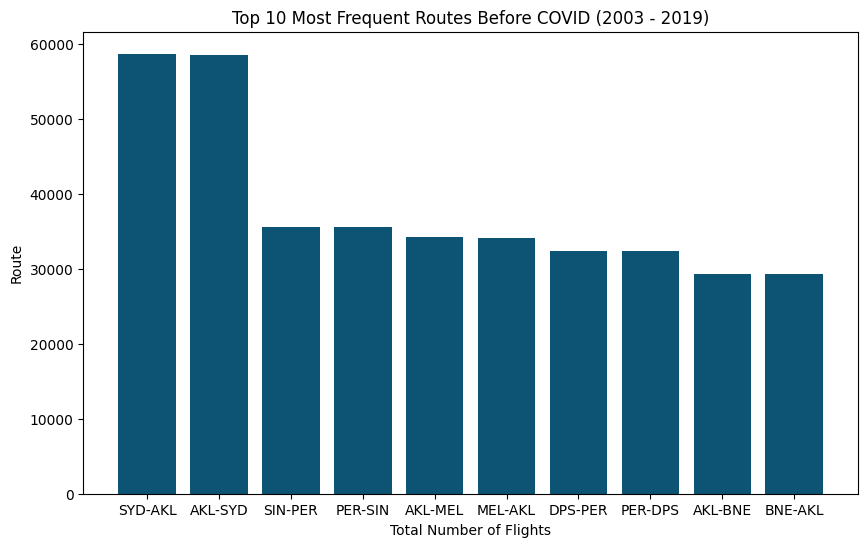

In [18]:
pre_covid_df = df[df['year'] < 2020]
route_aggregation = pre_covid_df.groupby(['route']).agg({'all_flights': 'sum'}).reset_index()
top_routes = route_aggregation.sort_values(by='all_flights', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_routes['route'], top_routes['all_flights'])
plt.xlabel('Total Number of Flights')
plt.ylabel('Route')
plt.title('Top 10 Most Frequent Routes Before COVID (2003 - 2019)')
plt.show()

## After Covid (2020 - 2022)

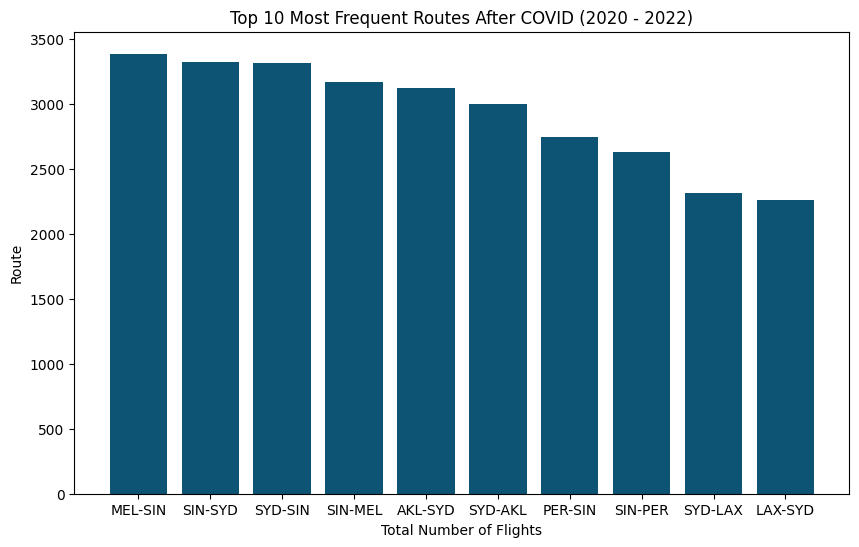

In [19]:
after_covid_df = df[df['year'] >= 2020]
route_aggregation = after_covid_df.groupby(['route']).agg({'all_flights': 'sum'}).reset_index()
top_routes = route_aggregation.sort_values(by='all_flights', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_routes['route'], top_routes['all_flights'])
plt.xlabel('Total Number of Flights')
plt.ylabel('Route')
plt.title('Top 10 Most Frequent Routes After COVID (2020 - 2022)')
plt.show()

## Airline Distribution Per Year

In [20]:
yearly_airline = df.groupby(['year', 'airline']).agg({'all_flights':'sum'}).reset_index()
yearly_airline.loc[yearly_airline['all_flights'] < 2401, 'airline'] = 'Other flights'
yearly_airline['year'] = pd.Categorical(yearly_airline['year'], ordered=True, categories=sorted(yearly_airline['year'].unique()))
yearly_airline = yearly_airline.sort_values(by=['year', 'all_flights'], ascending=[True, False])

fig = px.sunburst(
    yearly_airline,
    path=['year', 'airline'],
    values='all_flights',
    title='Airline Distribution Per Year',
    color='year',
    color_continuous_scale=color_palette
)

fig.update_layout(
    width=1000,
    height=700
)

fig.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Flight Distribution For Each Year

In [21]:
yearly_in_out = df.groupby(['year', 'month_num', 'in_out']).agg({'all_flights': 'sum'}).reset_index()
yearly_in_out_pivot = yearly_in_out.pivot_table(index=['year', 'month_num'], columns='in_out', values='all_flights').fillna(0)
yearly_in_out_pivot.reset_index(inplace=True)
yearly_in_out_pivot = yearly_in_out_pivot.sort_values(by=['year', 'month_num'])

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

yearly_in_out_pivot['year_month'] = yearly_in_out_pivot.apply(lambda row: f"{month_names[row['month_num']]}", axis=1)

In [22]:
fig = go.Figure()

years = yearly_in_out_pivot['year'].unique()
for year in years:
    filtered_data = yearly_in_out_pivot[yearly_in_out_pivot['year'] == year]
    year_month = filtered_data['year_month']
    
    fig.add_trace(go.Bar(
        x=year_month,
        y=filtered_data.get('I', 0),
        name=f'Incoming Flights ({year})',
        visible=(year == years[0]),
        marker=dict(color=color_palette[1])
    ))

    fig.add_trace(go.Bar(
        x=year_month,
        y=filtered_data.get('O', 0),
        name=f'Outgoing Flights ({year})',
        visible=(year == years[0]),
        marker=dict(color=color_palette[-3])
    ))

buttons = []
for year in years:
    buttons.append(dict(
        method='update',
        label=str(year),
        args=[{'visible': [year == y for y in years for _ in range(2)]},
              {'title': f'Number of Incoming and Outgoing Flights per Month in {year}'}]
    ))

all_year_months = yearly_in_out_pivot['year_month']

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.005,
        xanchor='left',
        y=1,
        yanchor='top'
    )],
    barmode='stack',
    title='Number of Incoming and Outgoing Flights per Month for Each Year',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=all_year_months,
        ticktext=all_year_months
    ),
    yaxis=dict(title='Number of Flights'),
    legend=dict(x=0.01, y=0.99),
    width=1000,
    height=600
)

fig.show()

## Most Popular Country

In [23]:
country_avg_flights = df.groupby('port_country')['total_seats'].mean().reset_index()
country_avg_flights = country_avg_flights.sort_values(by='total_seats', ascending=True)

# assuming that the plane is full capacity each time

fig = go.Figure(go.Bar(
    x=country_avg_flights['total_seats'],
    y=country_avg_flights['port_country'],
    orientation='h',
))

fig.update_layout(
    title='Average Number of Flights per Month by Country',
    xaxis_title='Average Number of Passengers Per Month',
    yaxis_title='Country',
    height=1000,
    width=900
)

fig.show()

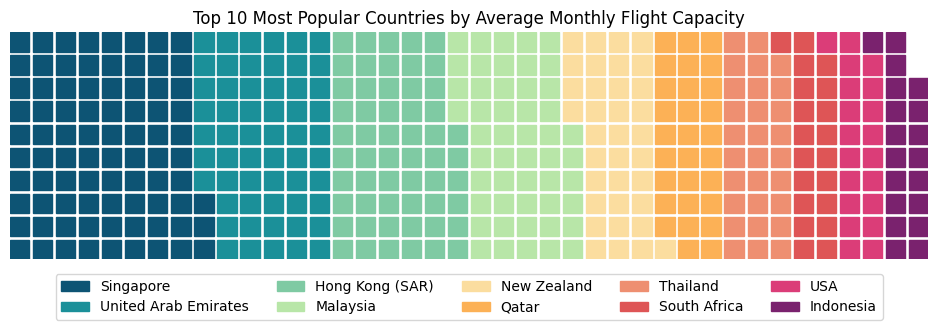

In [24]:
country_seats_dict = {}

country_avg_flights = country_avg_flights.sort_values(by='total_seats', ascending=False)
for index, row in country_avg_flights[:10].iterrows():
    country = row['port_country']
    total_seats = row['total_seats']
    country_seats_dict[country] = total_seats / 10000

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=country_seats_dict,
    figsize=(10, 6),
    legend={'loc': 'lower center', 'bbox_to_anchor': (0.5, -0.3), 'ncol': 5},
    colors=color_palette
)

plt.title("Top 10 Most Popular Countries by Average Monthly Flight Capacity")
plt.show()